# GPT4v Few-shot Learning Utility Package 

## When is this useful

## How to use this

### 1. Prepare your question, examples, and the image you want to test.

In [1]:
question = "Extract parking fee information from the picture."
examples = [
    {
        "image_path": "./sample_images/parking-fee-sample-1.png",
        "output": "- 8:00-22:00 220 yen / 40 min\n- 22:00-8:00 110 yen / 60 min\n- max: 1100 yen",
    },
    {
        "image_path": "./sample_images/parking-fee-sample-2.png",
        "output": "- 8:00-22:00 330 yen / 60 min\n- 22:00-8:00 110 yen / 60 min\n- max: 770 yen / 24 hours",
    },
    {
        "image_path": "./sample_images/parking-fee-sample-3.png",
        "output": "- 8:00-20:00 440 yen / 12 min\n- 20:00-8:00 110 yen / 60 min\n- max: 2800 yen / 5 hours",
    },
    {
        "image_path": "./sample_images/parking-fee-sample-4.png",
        "output": "-110 yen / 20 min\n- 8:00-19:00 max 880 yen\n- 19:00-8:00 max 440 yen",
    },
]
test_image_path = "./sample_images/parking-fee-test-1.png"

Optionally, let's take a look at the test image, just to make sure it's the right one.

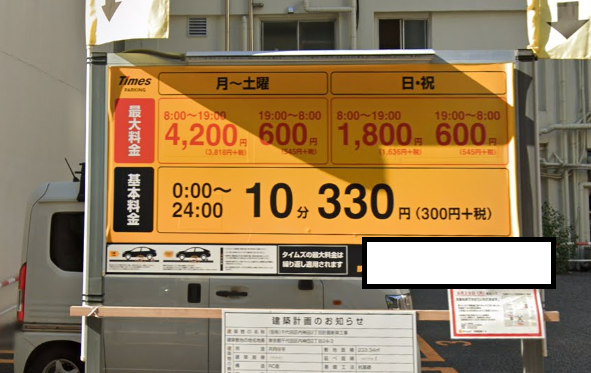

In [2]:
from IPython.display import Image
test_image = Image(test_image_path)
display(test_image)

### 2. Use GPT4v-fsl

GPT4v-fsl plays good old OOP, where you import the `FewShotLearning` class and instantiate an instance to take care of sending zero-shot, one-shot, and few-shot requests. 

You can either use it in a Jupyter notebook for a quick run, or in your Python application.

In [3]:
from fsl import FewShotLearning

At initialization you can optionally pass in a `configs` object to specify your API key, API version, API endpoint, and the model deployment name. You can choose to provide some or all of these in the configs. If not provided, GPT4v-fsl will look for them in the environment variables.

```python
# optional configs
configs = {
    'api_key': '<your API key>',
    'api_version': '<your API version>,'
    'endpoint': '<your API endpoint (with the trailing slash)>',
    'model': '<your model deployment name>',
}
```

In [4]:
# add the configs parameter here if you have one
fsl = FewShotLearning(
    examples=examples, question=question, test_image_url=test_image_path
)

### Compare zero-shot, one-shot, and few-shots

Use `run_all_shots()` you can kick off zero-shot, one-shot and few-shots at once and compare the results side by side.

In [5]:
responses = await fsl.run_all_shots()
for idx, res in enumerate(responses):
    print(f'==== {idx} ====')
    print(res.choices[0].message.content)

2024-04-17 09:48:23,966 - root - INFO - Zero shot request sent.
2024-04-17 09:48:23,992 - root - INFO - One shot request sent.
2024-04-17 09:48:24,015 - root - INFO - Few shot request sent.
2024-04-17 09:48:25,533 - httpx - INFO - HTTP Request: POST https://aoai-quickstart-alex-au.openai.azure.com//openai/deployments/gpt-4-vision-10k/chat/completions?api-version=2024-02-01 "HTTP/1.1 429 Too Many Requests"
2024-04-17 09:48:25,536 - openai._base_client - INFO - Retrying request to /deployments/gpt-4-vision-10k/chat/completions in 60.000000 seconds
2024-04-17 09:48:29,838 - httpx - INFO - HTTP Request: POST https://aoai-quickstart-alex-au.openai.azure.com//openai/deployments/gpt-4-vision-10k/chat/completions?api-version=2024-02-01 "HTTP/1.1 200 OK"
2024-04-17 09:48:29,846 - root - INFO - Zero shot response received. Time elapsed: 5.879436254501343 seconds.
2024-04-17 09:48:30,770 - httpx - INFO - HTTP Request: POST https://aoai-quickstart-alex-au.openai.azure.com//openai/deployments/gpt-4

==== 0 ====
The parking fee information shown in the picture is as follows:

- Daytime rate (8:00~19:00): 4,200 yen
- Nighttime rate (19:00~8:00): 600 yen
- Flat rate (8:00~19:00): 1,800 yen
- Flat rate (19:00~8:00): 600 yen

Additionally, there is a maximum fee of 330 yen from 0:00 to 24:00, which applies every 10 minutes, and the fee per 10 minutes is 300 yen plus tax.
==== 1 ====
- Weekdays: 
  - 8:00-19:00: 4200 yen max
  - 19:00-8:00: 600 yen max

- Saturday and public holidays:
  - 8:00-19:00: 1800 yen max
  - 19:00-8:00: 600 yen max

- 0:00-24:00: 10 minutes / 330 yen (with a starting rate of 300 yen)
==== 2 ====
- Weekdays (月〜土): 
  - 8:00-19:00 max 4,200 yen
  - 19:00-8:00 max 600 yen
- Sunday (日-祝):
  - 8:00-19:00 max 1,800 yen
  - 19:00-8:00 max 600 yen
- 0:00-24:00 330 yen / 10 min (300 yen after)


GPT4v-fsl uses asynchronous concurrency to speed up running multiple tests. If you're in a Jupyter notebook, which uses async/awiat at the top level already, all you need is an `await` keyword.

On the other hand, in your own Python script, you would need to use `asyncio.run` for the entry point.

```python
# If you take care of your won async/await event loop
responses = asyncio.run(fsl.run_all_shots())
```